In [2]:
import six
import sys

from statsmodels.genmod.families.links import probit

sys.modules['sklearn.externals.six'] = six
import numpy as np
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
random_state = 2000



In [3]:
#fitness = mlrose.Queens()


In [23]:
# Problem definition
length = 35
global eval_count
eval_count = 0
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    global eval_count
    eval_count += 1
    # Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

In [24]:
problem = mlrose.QueensOpt(length=length,
                      fitness_fn=fitness_cust,
                      maximize=True)
experiment_name = "queen_prob"
output_directory = "queen"


In [13]:
def plot_fitness_iteration(curve, title, x="Iteration", y="Fitness"):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    length = len(curve)
    plt.plot(range(length), curve[:,0], label=y, lw=2)
    plt.legend(loc="best")
    plt.show()

In [14]:
# Define decay schedule
schedule = mlrose.ExpDecay()

# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Solve problem using simulated annealing
best_state, best_fitness , sacurve = mlrose.simulated_annealing(problem, schedule = schedule,max_attempts = 10, max_iters = 10, random_state = 1)

print(best_state)

print(best_fitness)


[12  8  9  4  5 15  0 27  1 12  7  6 25  8 18 20 11 28 29 14  4 23  9 27
 32 24 13  9  7 22  1  0 17  8 24]
560.0


Simulated Annealing - Total Function Evaluations: 2348


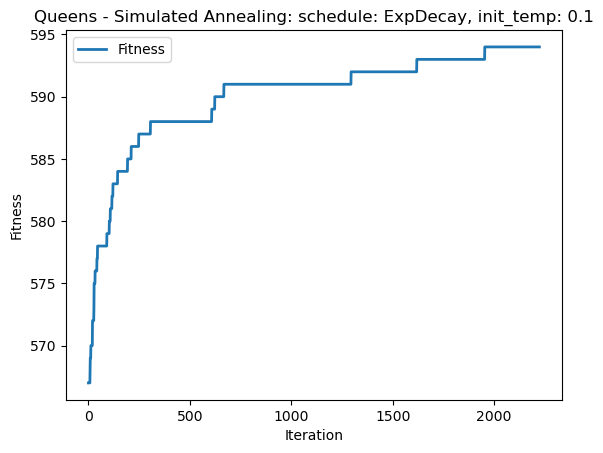

In [16]:
# Solve problem using simulated annealing
max_attempts = 200
max_iters = 2500
init_temp = 0.1
schedule = mlrose.ExpDecay(init_temp)
global eval_count
eval_count = 0
best_state, best_fitness, sa_curve = mlrose.simulated_annealing(problem,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             schedule=schedule,
                                                             curve=True)
print("Simulated Annealing - Total Function Evaluations:", eval_count)
plot_fitness_iteration(sa_curve,
                       "Queens - Simulated Annealing: schedule: {}, init_temp: {}".format(schedule.__class__.__name__, init_temp))


Randomized Hill Climbing - Total Function Evaluations: 2226
[14  6 13  5 25 29 24 34 28 22  9  5 26  8 33  2 32  9 19  1 32 21 31  0
 15 18  6 31 16 11 27 20  3 17 30]
588.0


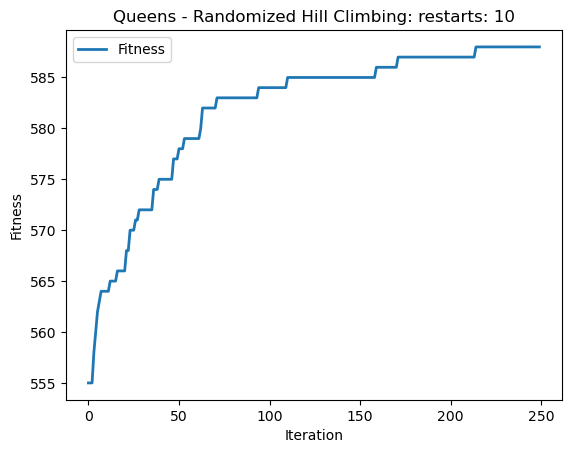

In [17]:
# Solve problem using Random Hill
max_attempts = 50
max_iters = 250
restarts = 10
global eval_count
eval_count = 0
best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
print("Randomized Hill Climbing - Total Function Evaluations:", eval_count)
print(best_state)

print(best_fitness)

plot_fitness_iteration(rhc_curve,
                       "Queens - Randomized Hill Climbing: restarts: {}".format(restarts))

In [10]:
mim = mlrose.MIMICRunner(problem=problem,
                       experiment_name=experiment_name,
                       output_directory=output_directory,
                       seed=random_state,
                       population_sizes=[50, 100, 200, 500, 1000, 2000],
                       keep_percent_list=[0.1, 0.25, 0.5, 0.7, 0.8],
                       iteration_list=[50],
                       use_fast_mimic=True)
mim_stats, mim_curve = mim.run()



MIMIC - Total Function Evaluations: 25033


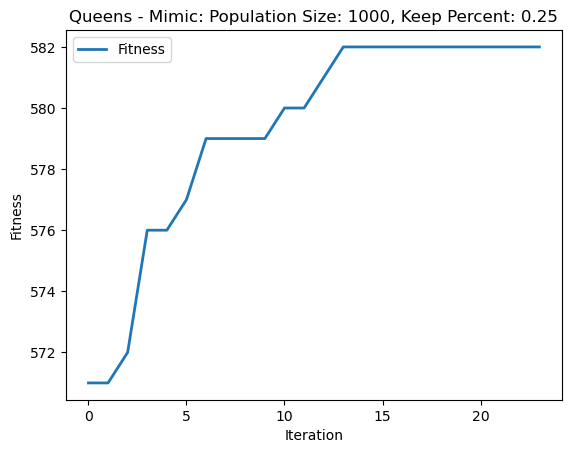

In [18]:
max_attempts = 10
max_iters = 25
keep_pct=0.25
pop_size = 1000
global eval_count
eval_count = 0
best_state, best_fitness, mimic_curve = mlrose.mimic(problem,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             random_state=random_state,
                                             pop_size=pop_size,
                                             keep_pct=keep_pct,
                                             curve=True)
print("MIMIC - Total Function Evaluations:", eval_count)
plot_fitness_iteration(mimic_curve,
                       "Queens - Mimic: Population Size: {}, Keep Percent: {}".format(pop_size, keep_pct))

In [19]:
ga = mlrose.GARunner(problem=problem,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=20,
                   iteration_list=[100],
                   population_sizes=[100, 500, 1000],
                   mutation_rates=[0.1, 0.25, 0.5, 0.75, 0.9])
ga_stats, ga_curve = ga.run()

Genetic Alg - Total Function Evaluations: 10430


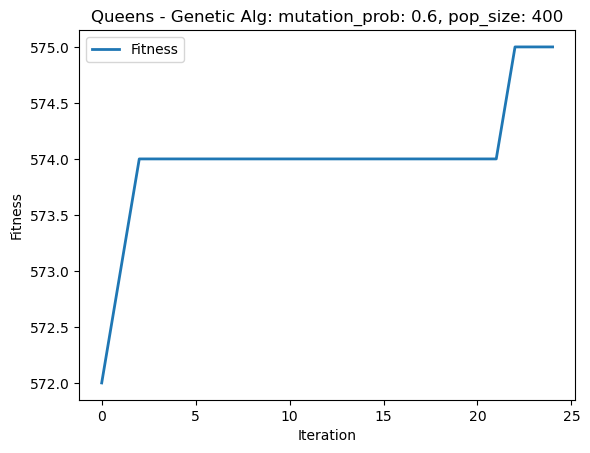

In [25]:
max_attempts = 20
max_iters = 25
mutation_prob=0.6
pop_size = 400
global eval_count
eval_count = 0
best_state, best_fitness, gen_curve = mlrose.genetic_alg(problem,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   random_state=random_state,
                                                   pop_size=pop_size,
                                                   mutation_prob=mutation_prob,
                                                   curve=True)
print("Genetic Alg - Total Function Evaluations:", eval_count)
plot_fitness_iteration(gen_curve,
                       "Queens - Genetic Alg: mutation_prob: {}, pop_size: {}".format(mutation_prob, pop_size))